In [1]:
import sys
#sys.path.append('/Users/chandrasekharmukherjee/Home/Centrality framework/MCPC_Clustering/Codes')
sys.path.append('I:/내 드라이브/backup/document/USC/Research/MCPC/Code/Codes')

In [2]:
# This code is to test Louvain Method with custom Modularity Function
import numpy as np
import networkx as nx
import networkx.algorithms.community.quality as nx_quality
import networkx.algorithms.community as nx_comm
# from Custom_Func import directed_modularity, modularity, _one_level


In [3]:
%load_ext autoreload
%autoreload 2
import importlib

import Real_Custom_v2 as Real_Custom
Real_Custom = importlib.reload(Real_Custom)

import FlowRank as FR
FR=importlib.reload(FR)

# Directed Graph

In [4]:
#Directed graph example

n_s=100
val = np.random.uniform(low=0.0, high=1.0, size=(n_s, n_s))

label=np.zeros((n_s))

for i in range(n_s//2,n_s):
    label[i]=1


G = nx.DiGraph()

for i in range(n_s):
    for j in range(n_s):

        if((i<n_s//2 and j <n_s//2) or (i>n_s//2 and j>n_s//2)):
            if(val[i][j]>0.3):
                G.add_edge(i,j,weight=1)
        else:
            if(val[i][j]>0.8):
                G.add_edge(i,j,weight=1)


#G.add_edges_from([(1,2),(2,3),(3,1),(1,4),(4,1),(4,5),(5,4),(5,6),(6,3),(3,6),(6,2),(2,6),(4,7),(7,5),(7,4)])

# G = nx.DiGraph()
# G.add_nodes_from([1,2,3])
# G.add_edges_from([(2,3),(1,3),(3,1)])#visualize
# nx.draw(G, with_labels=True)

## Louvain Partition on G

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}]
Time taken for original Louvain: 0.029703140258789062
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}]
Time taken for our implementation: 0.04031062126159668


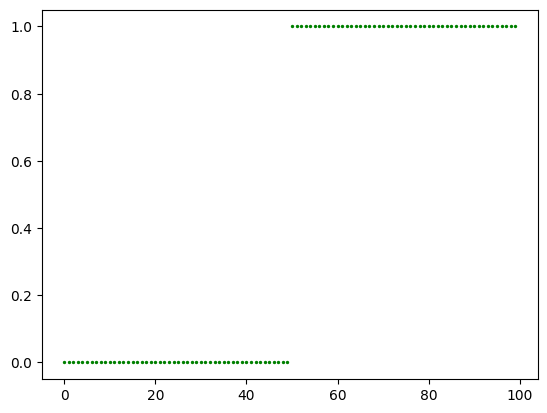

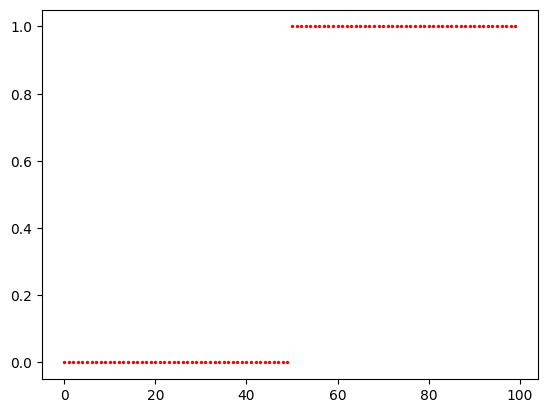

The NMI score of original Louvain compared to true label: 1.0
The NMI score of our implementation compared to true label: 1.0
Are the two partitions same? True


In [22]:
import debug as debug
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import itertools
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI

nx_comm.louvain._one_level=debug._one_level


#run time recording
import time
start = time.time()
og_partition = nx_comm.louvain.louvain_partitions(G, seed=0)

final_partition_1 = deque(og_partition, maxlen=1).pop()
end = time.time()


print(final_partition_1)

print("Time taken for original Louvain:",end-start)

label_1=np.zeros((n_s))
c=0
for sets in final_partition_1:
    for ell in sets:
        label_1[ell]=c
    
    c=c+1


start = time.time()
partition = Real_Custom.louvain_partitions(G, seed=0)

final_partition_2 = deque(partition, maxlen=1).pop()
end = time.time()
print(final_partition_2)
print("Time taken for our implementation:",end-start)

label_2=np.zeros((n_s))
c=0
for sets in final_partition_2:
    for ell in sets:
        label_2[ell]=c
    c=c+1


xaxis=[i for i in range(n_s)]

plt.Figure()
plt.scatter(xaxis,label_1,s=2,color='green')
plt.show()

plt.Figure()
plt.scatter(xaxis,label_2,s=2,color='red')
plt.show()

print("The NMI score of original Louvain compared to true label:",round(NMI(label,label_1),3))
print("The NMI score of our implementation compared to true label:",round(NMI(label,label_2),3))

#Check if two partitions are same
print("Are the two partitions same?",final_partition_1==final_partition_2)

## FlowRank & Custom Modularity Function

In [5]:
#Directed graph example

n_s=100
val = np.random.uniform(low=0.0, high=1.0, size=(n_s, n_s))

label=np.zeros((n_s))

for i in range(n_s//2,n_s):
    label[i]=1


G = nx.DiGraph()

for i in range(n_s):
    for j in range(n_s):

        if((i<=n_s//2 and j <=n_s//2) or (i>n_s//2 and j>n_s//2)):
            if(val[i][j]>0.3 and ((j<=25) or (j>=75))): #j = core
                G.add_edge(i,j,weight=1)
            elif(val[i][j]>0.9):
                G.add_edge(i,j,weight=1)
        else:
            if(val[i][j]>0.99):
                G.add_edge(i,j,weight=1)


#G.add_edges_from([(1,2),(2,3),(3,1),(1,4),(4,1),(4,5),(5,4),(5,6),(6,3),(3,6),(6,2),(2,6),(4,7),(7,5),(7,4)])

# G = nx.DiGraph()
# G.add_nodes_from([1,2,3])
# G.add_edges_from([(2,3),(1,3),(3,1)])#visualize
#nx.draw(G, with_labels=True)

100
100


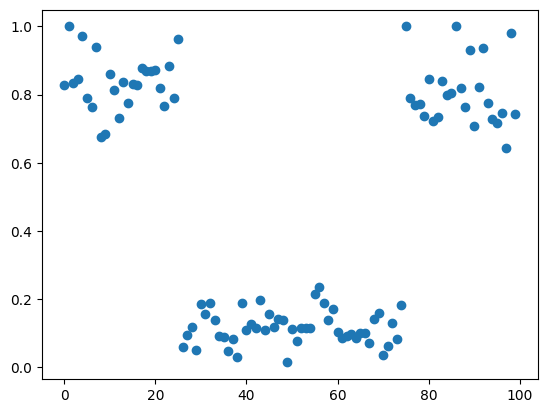

In [6]:

import matplotlib.pyplot as plt


v_cover_order=FR.FLOW(G.edges(),G.nodes(),1)
print(n_s)
xv=[i for i in range(n_s)]

yv=np.zeros((n_s))
for i in range(n_s):
    idx=int(v_cover_order[i,1])
    val=v_cover_order[i,0]
    yv[idx]=val


plt.Figure()
plt.scatter(xv,yv)



Check FlowRank function

In [7]:
import FlowRank as FR
#print(FR.FLOW_ng(G.edges(),G.nodes(),1)) # (FR, Node#)

node2FR = dict()
for i in FR.FLOW_ng(G.edges(),G.nodes(),1):
    node_num = int(i[1])
    node2FR[node_num] = i[0]

print(node2FR)

{4: 1.0, 86: 1.0, 98: 1.0, 75: 0.9767441860465117, 25: 0.9761904761904763, 1: 0.9638554216867469, 17: 0.9399477806788513, 22: 0.9333333333333333, 82: 0.9333333333333333, 15: 0.9327731092436974, 0: 0.9292035398230089, 19: 0.9268292682926829, 20: 0.925, 23: 0.9244712990936557, 11: 0.9230769230769231, 79: 0.923076923076923, 16: 0.9210526315789473, 87: 0.9193548387096774, 21: 0.9192546583850931, 92: 0.9192546583850931, 78: 0.9176470588235295, 89: 0.9173553719008263, 88: 0.9171974522292993, 3: 0.9168539325842696, 85: 0.9130434782608695, 10: 0.9107142857142858, 2: 0.9090909090909093, 14: 0.9068702290076337, 94: 0.9053254437869824, 97: 0.9049360146252285, 84: 0.9032846715328466, 91: 0.9025787965616044, 6: 0.9024390243902438, 7: 0.9024390243902438, 83: 0.9024390243902438, 77: 0.8994708994708995, 76: 0.8988326848249029, 5: 0.8970976253298154, 90: 0.8967391304347827, 12: 0.895615866388309, 93: 0.894736842105263, 95: 0.8921282798833821, 13: 0.891566265060241, 18: 0.891566265060241, 81: 0.89005235

## Loading dataset

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from pynndescent import NNDescent
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
# from scanpy import read_h5ad
# import utils
import scipy
from scipy import sparse
import metric as met 
# import simulation as simm
import embedding as embed
import FlowRank as FR

from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from sklearn.metrics import v_measure_score as v_score
from sklearn.metrics import homogeneity_score as homogeneity
from sklearn.metrics import completeness_score as completeness

In [27]:
# data = sparse.load_npz('I:/내 드라이브/backup/document/USC/Research/MCPC/pca-benchmarks/pca-benchmarks/data/ALM/data.npz')
# data = data.todense()
# data = np.array(data)


In [9]:
name='Zhengmix'
kchoice=20 #k neighbors in KNN
datapath = 'I:/내 드라이브/backup/document/USC/Research/MCPC/pca-benchmarks/pca-benchmarks/data/'

X = scipy.sparse.load_npz(datapath+name + '/data.npz')
label = np.load(datapath+name+'/labels.npy')
print(name,len(label))

#Log transform+PCA
X.data = np.log1p(X.data)
print("Log transform done")
pca = TruncatedSVD(n_components=50)
PX = pca.fit_transform(X)
n=PX.shape[0]
walk_len_c1=int(np.log2(n))
print(PX.shape)


#Calculte inital KNN accuracy
met.KNN_graph_acc(PX,kchoice,0,label)

# #Get the KNN edgelist
edge_list,vlist=embed.dir_KNN_graph(PX,kchoice,0)
print(len(edge_list))

Zhengmix 3994
Log transform done
(3994, 50)
Accuracy of  20 -NN graph is 0.784
79880


In [10]:
from collections import defaultdict, deque

def get_labels(partition,n_s):
    final_partition_1 = deque(partition, maxlen=1).pop()
    #print(final_partition_1)


    label_1=np.zeros((n_s))
    c=0
    for sets in final_partition_1:
        for ell in sets:
            label_1[ell]=c
        
        c=c+1

    return label_1

In [18]:
G = nx.DiGraph()
for (u,v) in edge_list:
    G.add_edge(u,v,weight=1)

#nx_comm.louvain._one_level=Custom_Func._one_level

res_list=[0.8,0.85,0.9,0.95,1,1.05,1.1,1.2,1.3,1.5,3,10]

for res in res_list:
    partition = nx_comm.louvain.louvain_partitions(G, seed=0,resolution=res)
    label_new=get_labels(partition,n)
    print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))

print("\n\n")

res_list=[0.8,0.85,0.9,0.95,1,1.05,1.1,1.2,1.3,1.5,3,10]


for res in res_list:
    partition1=Real_Custom.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    print(res,round(NMI(label,label_new1),2),round(met.purity_score(label,label_new1),2))

0.8 0.71 0.71
0.85 0.73 0.79
0.9 0.72 0.78
0.95 0.71 0.78
1 0.7 0.78
1.05 0.7 0.78
1.1 0.7 0.79
1.2 0.7 0.79
1.3 0.69 0.8
1.5 0.68 0.79
3 0.63 0.82
10 0.55 0.84



0.8 0.69 0.55
0.85 0.69 0.55
0.9 0.69 0.55
0.95 0.78 0.66
1 0.78 0.66
1.05 0.78 0.66
1.1 0.78 0.66
1.2 0.78 0.66
1.3 0.77 0.65
1.5 0.78 0.66
3 0.77 0.66
10 0.69 0.81


## Result Metrics Table and Visualization

In [38]:
def metrics_summary(labels,label):
    #partitions is a list of partitions
    #label is the true label
    #1) Generate a table of NMI, Purity, V-score, Homogeneity, Completeness according to various resolutions

    # res_list=[0.8,0.85,0.9,0.95,1,1.05,1.1,1.2,1.3,1.5,3,10]
    n=len(label)
    NMI_list=[]
    Purity_list=[]
    V_list=[]
    Homogeneity_list=[]
    Completeness_list=[]

    for label_new in labels:
        NMI_list.append(round(NMI(label,label_new),2))
        Purity_list.append(round(met.purity_score(label,label_new),2))
        V_list.append(round(v_score(label,label_new),2))
        Homogeneity_list.append(round(homogeneity(label,label_new),2))
        Completeness_list.append(round(completeness(label,label_new),2))
        
        # print("NMI",round(NMI(label,label_new),2))
        # print("Purity",round(met.purity_score(label,label_new),2))
        # print("V-score",round(v_score(label,label_new),2))
        # print("Homogeneity",round(homogeneity(label,label_new),2))
        # print("Completeness",round(completeness(label,label_new),2))
        
    #Draw a table
    data = {'NMI':NMI_list,'Purity':Purity_list,'V-score':V_list,'Homogeneity':Homogeneity_list,'Completeness':Completeness_list}
    df = pd.DataFrame(data)
    print(df)

In [39]:
res_list=[0.8,0.85,0.9,0.95,1,1.05,1.1,1.2,1.3,1.5,3,10]
labels=[]

for res in res_list:
    partition = nx_comm.louvain.louvain_partitions(G, seed=0,resolution=res)
    label_new=get_labels(partition,n)
    labels.append(label_new)
    print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))

print("\n\n")

res_list=[0.8,0.85,0.9,0.95,1,1.05,1.1,1.2,1.3,1.5,3,10]


for res in res_list:
    partition1=Real_Custom.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
    print(res,round(NMI(label,label_new1),2),round(met.purity_score(label,label_new1),2))
    
metrics_summary(labels,label)

0.8 0.71 0.71
0.85 0.73 0.79
0.9 0.72 0.78
0.95 0.71 0.78
1 0.7 0.78
1.05 0.7 0.78
1.1 0.7 0.79
1.2 0.7 0.79
1.3 0.69 0.8
1.5 0.68 0.79
3 0.63 0.82
10 0.55 0.84



0.8 0.69 0.55
0.85 0.69 0.55
0.9 0.69 0.55
0.95 0.78 0.66
1 0.78 0.66
1.05 0.78 0.66
1.1 0.78 0.66
1.2 0.78 0.66
1.3 0.77 0.65
1.5 0.78 0.66
3 0.77 0.66
10 0.69 0.81
     NMI  Purity  V-score  Homogeneity  Completeness
0   0.71    0.71     0.71         0.71          0.71
1   0.73    0.79     0.73         0.75          0.70
2   0.72    0.78     0.72         0.74          0.69
3   0.71    0.78     0.71         0.74          0.67
4   0.70    0.78     0.70         0.74          0.67
5   0.70    0.78     0.70         0.74          0.67
6   0.70    0.79     0.70         0.74          0.65
7   0.70    0.79     0.70         0.74          0.65
8   0.69    0.80     0.69         0.77          0.63
9   0.68    0.79     0.68         0.76          0.62
10  0.63    0.82     0.63         0.78          0.53
11  0.55    0.84     0.55         